In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
np.random.seed(1)


S = 60 # trials of intrinsic sigma
N = 50 # trials for each intrinsic sigma
M = 20 # number of draws from the normal
intrinsic_sigma_max = 200

def simulate_var(intrinsic_sigma, N=50, M=20):
    vals = np.zeros(N, dtype=float)
    
    for j in range(N):
        v = np.random.normal(0, intrinsic_sigma, size=M)
        std = np.sqrt(np.sum((v - np.mean(v))**2)/(M-1))
        vals[j] = std
    
    return np.sqrt(np.sum(vals**2)/(N-1))


def simulate(S, N, M, intrinsic_sigma_max=200):

    intrinsic_sigmas = np.linspace(1, intrinsic_sigma_max, S)

    var_sim = np.zeros(S)
    approx_var_sim = np.zeros(S)

    for i, intrinsic_sigma in enumerate(intrinsic_sigmas):

        var_sim[i] = simulate_var(intrinsic_sigma, N=N, M=M)
        '''
        vals = np.zeros(N, dtype=float)

        for j in range(N):
            v = np.random.normal(0, intrinsic_sigma, size=M)
            std = np.sqrt(np.sum((v - np.mean(v))**2)/(M-1))
            vals[j] = np.sqrt(2) * std

        var_sim[i] = np.sqrt(np.sum(vals**2)/(N-1)) #(np.std(vals)/np.sqrt(N))**2
        '''
    
    return (intrinsic_sigmas, var_sim)

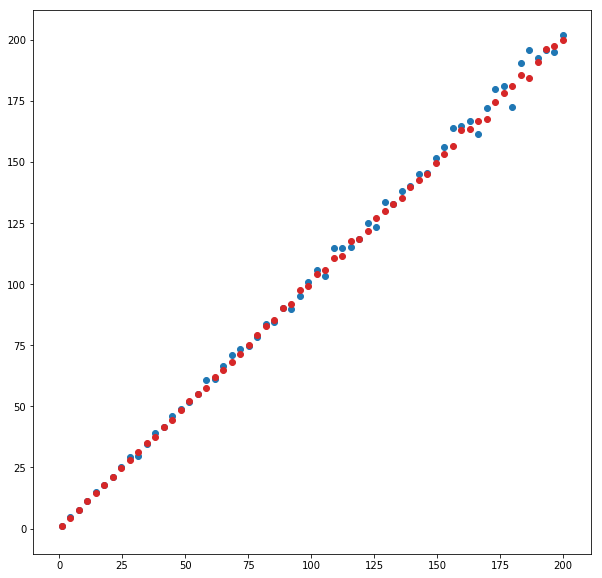

In [38]:
x, y = simulate(S, N, M)
x1, y1 = simulate(S, N*3, M*2)


fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, c="tab:blue")
ax.scatter(x1, y1, c="tab:red")